# Python _MySQL Crud Operation.

## Things to know Before Getting into the coding.

## What is Database?

A database is an organized collection of structured information, or data, typically stored electronically in a computer system. A database is usually controlled by a database management system (DBMS). Together, the data and the DBMS, along with the applications that are associated with them, are referred to as a database system, often shortened to just database.

## What is Structured Query Language (SQL)?

SQL is a programming language used by nearly all relational databases to query, manipulate, and define data, and to provide access control. 


## What is a Database Driver/Connector ?

Connector/Driver enables programs to access databases.

## What is pip?

pip is the standard package manager for Python. It allows you to install and manage additional packages that are not part of the Python standard library.

Using pip We Can Install the Required Drivers/connectors to access Database.

## What is Cursor?

Cursor,It Helps Python to Interact with the MySQL Server.An instance of the MySQLCursor class is also called a cursor.

In [ ]:
pip install mysql-connector-python

# Connecting Database (MySQL) from Python.

In [ ]:
# Before Connecting Check 

# Database Software is Installed.
# Wheather appropriate Connectors/Drivers are Installed.
# Database Server Running are !.
# Authentication Method Used at Database Server Side(i.e naive password,sha256.,).
# Valid Server Address and Port no.(IP_Add:Port_No) to Establish Connection.
# A Valid UserName/Password to Access Database.

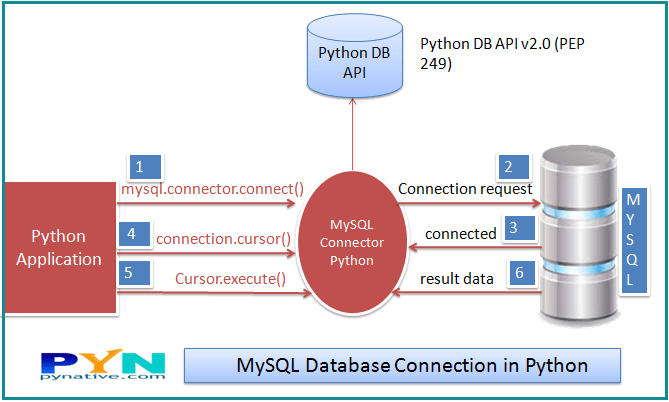

## import Required Connectors:

In [6]:
from mysql.connector import connect,Error,errorcode

## Establishing a Connection Using Connection String.

    Method #1:  Using try/with block

    Method #2:  Using Connection Object.

In [ ]:
#     Method #1:  Using try block

from getpass import getpass

try:
    with connect( 
        
    host = "localhost",
        
    port = "3306",
        
    user = 'Py_MySQL_User',
        
    password = getpass("Enter Password"),
        
    database="classicmodels",    
        
    auth_plugin = "mysql_native_password"
        
    ) as Python_MySQL_Conn_try:
        print(Python_MySQL_Conn_try)
except Error as  Python_MySQL_Conn_Err:
    if Python_MySQL_Conn_Err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        
        print("Invalid UserName Password")
        
    elif Python_MySQL_Conn_Err.errno == errorcode.ER_BAD_DB_ERROR:
        
        print("Database does not exist")

In [ ]:
Python_MySQL_Conn = connect(
    
    host = "localhost",
        
    port = "3306",
        
    user = 'Py_MySQL_User',
        
    password = getpass("Enter Password"),
        
    database="classicmodels",    
        
    auth_plugin = "mysql_native_password"
        
    )
    
Python_MySQL_Conn

In [7]:
Conn_String = {
                    "host":"localhost",

                    "port" : "3306",

                    "user" : 'Py_MySQL_User',

                    "password" : 'rootUser',

#                     'database':"classicmodels",    

                    'auth_plugin' : "mysql_native_password"
                }

Python_MySQL_Conn = connect(**Conn_String)

The Above code is now able to establish a connection to Mysql Server from Python.In that code,

host  -->It takes a IP_Address as a Value.It tells Where the actual Mysql Server is running which is going to be accessed.

port  -->A port is a virtual point where network connections start and end.Ports are software-based and managed by a computer's operating system. Each port is associated with a specific process or service.Here Mysql Server is running on port #3306(Default).

user  -->The Actual Mysql Username to Gain Access to Server.

password  -->The Actual Mysql Password to Gain Access to Server.

database  -->The Actual Mysql Database Name which is going to be Accessed.(Optional)

auth_plugin  -->Authentication Method Used to Secure Database from anonymous access.[mysql_native_password|caching_sha2_password]

In [8]:
# The Connection to the Database is Now established.
# From Here I am Going to Perform the Below Operation From Python.
# Create User and Privileges Granting.
# Create Database.
# Perform DDL/DML Operations. 

In [44]:
# Lets Check Whether Server Connected or ! .
if Python_MySQL_Conn:
    print("Connected")
    Python_MySQL_Conn.reset_session()

Connected


# Creating User,Granting Access,Removing User from Python

In [45]:
# We Need an Intermediate to Perform Database Operations.
# Here cursor Comes in action to act as an Intermediate between Python and Database Server.
# to Create a cursor object We need an Active Database Connection.

# Actual Syntax:

# Cursor_Name = Connection_Object.cursor()

# In Our Case:

Python_MySQL_Conn_Cursor = Python_MySQL_Conn.cursor()

In [46]:
# Create User:

# MySQL Query to Create New User.

MySQL_Query_Create_New_User = "CREATE USER IF NOT EXISTS 'User_Created_From_Python_15'@'localhost' IDENTIFIED BY 'root'"

# Now Using execute() Cursor Fn to Execute the Above Query.

try:
    Python_MySQL_Conn_Cursor.execute(MySQL_Query_Create_New_User)
        
except Error as MySQL_Query_Create_New_User_Execute:
    print(MySQL_Query_Create_New_User_Execute)

In [47]:
# SELECT user FROM mysql.user where user = "User_Created_From_Python";
# Python_MySQL_Conn_Cursor.execute("SELECT user FROM mysql.user")

MySQL_Query_Get_All_Users = "SELECT user FROM mysql.user"
Python_MySQL_Conn_Cursor.execute(MySQL_Query_Get_All_Users)

print(Python_MySQL_Conn_Cursor.fetchall())

[('Py_MySQL_User',), ('User_Created_From_Python_15',), ('debian-sys-maint',), ('mysql.infoschema',), ('mysql.session',), ('mysql.sys',), ('phpmyadmin',), ('root',)]


In [ ]:
# MySQL Query to Grant Privileges.

# MySQL Syntax_To_Grant Permissions

# GRANT <type_of_permission> ON <database_name.table_name> TO <'username'>@<'localhost'>;

# ALL PRIVILEGES- as we saw previously, this would allow a MySQL user full access to a designated database (or if no database is selected, global access across the system)
# CREATE- allows them to create new tables or databases
# DROP- allows them to them to delete tables or databases
# DELETE- allows them to delete rows from tables
# INSERT- allows them to insert rows into tables
# SELECT- allows them to use the SELECT command to read through databases
# UPDATE- allow them to update table rows
# GRANT OPTION- allows them to grant or remove other users’ privileges

Python_MySQL_Conn.reset_session()

MySQL_Query_Grant_Access = "GRANT ALL ON *.* TO 'User_Created_From_Python_1'@'localhost'"

# Above Query Gives All Access to Our Created User User_Created_From_Python_1.

try:
    Python_MySQL_Conn_Cursor.execute(MySQL_Query_Grant_Access)
    
except Error as MySQL_Query_Grant_Access_Execute:
    print(MySQL_Query_Grant_Access_Execute)

In [ ]:
# MySQL Query to View Privileges.

# MySQL Syntax_To_View Granted Permissions

# SHOW GRANTS FOR  <'username'>@<'localhost'>;

MySQL_Query_View_Access = "SHOW GRANTS FOR 'User_Created_From_Python_1'@'localhost'"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_View_Access)

Result_Set_Permission = Python_MySQL_Conn_Cursor.fetchall()

print(Result_Set_Permission)

In [50]:
# MySQL Query to Delete/Remove/Drop User.

# MySQL Syntax_To_Delete/Remove/Drop User.

# DROP USER <User_Name>;

MySQL_Query_Drop_User = "DROP USER IF EXISTS 'User_Created_From_Python_1'@'localhost'"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Drop_User)


In [51]:
# SELECT user FROM mysql.user where user = "User_Created_From_Python";
# Python_MySQL_Conn_Cursor.execute("SELECT user FROM mysql.user")

MySQL_Query_Get_All_Users = "SELECT user FROM mysql.user"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Get_All_Users)

result = Python_MySQL_Conn_Cursor.fetchall()

print(result)

[('Py_MySQL_User',), ('User_Created_From_Python_15',), ('debian-sys-maint',), ('mysql.infoschema',), ('mysql.session',), ('mysql.sys',), ('phpmyadmin',), ('root',)]


# Create/Drop Database.

In [52]:
# MySQL Query to Create Database.

# MySQL Syntax_To_Create_Database.

# CREATE <DATABASE> IF NOT EXISTS <Database_Name>;

# IF NOT EXISTS is used it creates only if given name does not conflict with an existing database's name.If ! it throws an error. 

MySQL_Query_Create_Database = "CREATE DATABASE IF NOT EXISTS Library_DataBase"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Create_Database)

In [53]:
# MySQL Query to list Available Databases.

# MySQL Syntax_To_View_Available_Databases.

# SHOW DATABASES;

MySQL_Query_Show_Database = "SHOW DATABASES"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Show_Database)

print(Python_MySQL_Conn_Cursor.fetchall())    

[('Library_DataBase',), ('classicmodels',), ('flask_db',), ('information_schema',), ('my_first_db',), ('mysql',), ('performance_schema',), ('phpmyadmin',), ('sakila',), ('sys',), ('tempk',), ('world',), ('world_x',)]


In [54]:
# MySQL Query to Drop Database.

# MySQL Syntax_To_Drop_Database.

# DROP DATABASE DATABASE_NAME;

MySQL_Query_Drop_Database = "DROP DATABASE IF EXISTS DATABASE_CREATED_FROM_PYTHON"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Drop_Database)

In [55]:
MySQL_Query_Show_Database = "SHOW DATABASES"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Show_Database)

print(Python_MySQL_Conn_Cursor.fetchall())   

[('Library_DataBase',), ('classicmodels',), ('flask_db',), ('information_schema',), ('my_first_db',), ('mysql',), ('performance_schema',), ('phpmyadmin',), ('sakila',), ('sys',), ('tempk',), ('world',), ('world_x',)]


In [56]:
# Once Database is Created We Need To Use it By Using 'use' Command.

# MySQL Syntax_To_Use_Database.

# USE DATABASE_NAME;

MySQL_Query_Use_Database = "USE Library_DataBase"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Use_Database)

# Create/Drop Table.

Here We are Going to Perform Create/Alter Table and its Attributes (i.e Columns).

In [83]:
# MySQL Query to Create Table.

# MySQL Syntax_To_Create_Table.

# CREATE  TABLE [IF NOT EXISTS] <TableName> (Column#1 <dataType>,Column#2 <dataType>,Column#n <dataType>;

MySQL_Query_Create_Table = "CREATE TABLE IF NOT EXISTS Table_Created_From_Python_3(Book_Id int,Book_Name varchar(30),Book_Edition varchar(30),Book_Author varchar(30),No_Of_Copies int,is_Available boolean,Book_Dept varchar(30),Book_ISBN varchar(30))"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Create_Table)


In [84]:
# MySQL Query to list Available Tables.

# MySQL Syntax_To_View_Available_Tables.

# SHOW TABLES;

MySQL_Query_Show_Table = "SHOW TABLES"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Show_Table)

print(Python_MySQL_Conn_Cursor.fetchall())    

[('Table_Created_From_Python_1',), ('Table_Created_From_Python_3',), ('Table_Renamed_From_Python',)]


In [59]:
# MySQL Query to View Table Structure.

# MySQL Syntax_To_View_Table_Structure.

# DESC <TableName>;

MySQL_Query_Describe_Table = "DESC Table_Created_From_Python"
Python_MySQL_Conn_Cursor.execute(MySQL_Query_Describe_Table)
print(Python_MySQL_Conn_Cursor.fetchall()) 

[('Book_Id', b'int', 'YES', '', None, ''), ('Book_Name', b'varchar(30)', 'YES', '', None, ''), ('Book_Edition', b'varchar(30)', 'YES', '', None, ''), ('Book_Author', b'varchar(30)', 'YES', '', None, ''), ('No_Of_Copies', b'int', 'YES', '', None, ''), ('is_Available', b'tinyint(1)', 'YES', '', None, ''), ('Book_Dept', b'varchar(30)', 'YES', '', None, ''), ('Book_ISBN', b'varchar(30)', 'YES', '', None, '')]


In [85]:
# MySQL Query to Drop/Delete/Remove Table.

# MySQL Syntax_To_Drop_Table.

# DROP TABLE [IF EXISTS] <TableName>;

MySQL_Query_Drop_Table = "DROP TABLE IF EXISTS Table_Created_From_Python_3"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Drop_Table)

MySQL_Query_Show_Table = "SHOW TABLES"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Show_Table)

print(Python_MySQL_Conn_Cursor.fetchall())

[('Table_Created_From_Python_1',), ('Table_Renamed_From_Python',)]


# Table ALTER Operations.

In [60]:
# Tables are now created.Now We Gonna Perform Some Table Operations Using ALTER Command.

# --> Alter/Change Column Datatype.

# --> Alter/Change Column Datatype Size.

# --> Alter/Change Table/Column Name.

# --> Add a New Column.

# --> Drop Column.

In [61]:
# --> Alter/Change Column Datatype.

# Basic Syntax:

# ALTER TABLE table_name
#   MODIFY column_name column_definition
#     [ FIRST | AFTER column_name ],
#   MODIFY column_name column_definition
#     [ FIRST | AFTER column_name ],
#   ...
# ;

MySQL_Query_ALTER_Table_DataType = "ALTER TABLE Table_Created_From_Python MODIFY Book_Id varchar(10)"


Python_MySQL_Conn_Cursor.execute(MySQL_Query_ALTER_Table_DataType)

MySQL_Query_Describe_Table = "DESC Table_Created_From_Python"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Describe_Table)

print(Python_MySQL_Conn_Cursor.fetchall()) 

[('Book_Id', b'varchar(10)', 'YES', '', None, ''), ('Book_Name', b'varchar(30)', 'YES', '', None, ''), ('Book_Edition', b'varchar(30)', 'YES', '', None, ''), ('Book_Author', b'varchar(30)', 'YES', '', None, ''), ('No_Of_Copies', b'int', 'YES', '', None, ''), ('is_Available', b'tinyint(1)', 'YES', '', None, ''), ('Book_Dept', b'varchar(30)', 'YES', '', None, ''), ('Book_ISBN', b'varchar(30)', 'YES', '', None, '')]


In [71]:
# --> Alter/Change Column Datatype Size.

MySQL_Query_ALTER_Table_DataType_Size = "ALTER TABLE Table_Created_From_Python_1 MODIFY Book_Id varchar(20)"


Python_MySQL_Conn_Cursor.execute(MySQL_Query_ALTER_Table_DataType_Size)

MySQL_Query_Describe_Table = "DESC Table_Created_From_Python_1"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Describe_Table)

print(Python_MySQL_Conn_Cursor.fetchall()) 


[('Book_Id', b'varchar(20)', 'YES', '', None, ''), ('Book_Name', b'varchar(30)', 'YES', '', None, ''), ('Book_Edition', b'varchar(30)', 'YES', '', None, ''), ('Book_Author', b'varchar(30)', 'YES', '', None, ''), ('No_Of_Copies', b'int', 'YES', '', None, ''), ('is_Available', b'tinyint(1)', 'YES', '', None, ''), ('Book_Dept', b'varchar(30)', 'YES', '', None, ''), ('Book_ISBN', b'varchar(30)', 'YES', '', None, '')]


In [76]:
# --> Alter/Change Table/Column Name.

# Basic Syntax For Column Rename:

# Basic Syntax For Table Rename:

# ALTER TABLE table_name
#   RENAME TO new_table_name;

# MySQL_Query_ALTER_Table_Rename = "ALTER TABLE Table_Created_From_Python RENAME TO Table_Renamed_From_Python"


# Python_MySQL_Conn_Cursor.execute(MySQL_Query_ALTER_Table_Rename)

MySQL_Query_Show_Table = "SHOW TABLES"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Show_Table)

print(Python_MySQL_Conn_Cursor.fetchall())   

[('Table_Created_From_Python_1',), ('Table_Renamed_From_Python',)]


In [78]:
# ALTER TABLE table_name
#   CHANGE COLUMN old_name new_name 
#     column_definition
#     [ FIRST | AFTER column_name ]


MySQL_Query_ALTER_Table_Column_Rename = "ALTER TABLE Table_Created_From_Python_1 CHANGE COLUMN Book_Id Book_Id_Renamed varchar(20)"


Python_MySQL_Conn_Cursor.execute(MySQL_Query_ALTER_Table_Column_Rename)

MySQL_Query_Describe_Table = "DESC Table_Created_From_Python_1"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Describe_Table)

print(Python_MySQL_Conn_Cursor.fetchall()) 


[('Book_Id_Renamed', b'varchar(20)', 'YES', '', None, ''), ('Book_Name', b'varchar(30)', 'YES', '', None, ''), ('Book_Edition', b'varchar(30)', 'YES', '', None, ''), ('Book_Author', b'varchar(30)', 'YES', '', None, ''), ('No_Of_Copies', b'int', 'YES', '', None, ''), ('is_Available', b'tinyint(1)', 'YES', '', None, ''), ('Book_Dept', b'varchar(30)', 'YES', '', None, ''), ('Book_ISBN', b'varchar(30)', 'YES', '', None, '')]


In [89]:
# --> Add a New Column.

# Add a Single Column.

# ALTER TABLE table_name
#   ADD COLUMN new_column_name column_definition
#     [ FIRST | AFTER column_name ];

# By Default Adds New Column as Last Column.

MySQL_Query_ALTER_Table_Column_Add = "ALTER TABLE Table_Created_From_Python_1 ADD New_Added_column_1 varchar(20) AFTER Book_Id_Renamed"


Python_MySQL_Conn_Cursor.execute(MySQL_Query_ALTER_Table_Column_Add)

MySQL_Query_Describe_Table = "DESC Table_Created_From_Python_1"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Describe_Table)

print(Python_MySQL_Conn_Cursor.fetchall()) 

[('Book_Id_Renamed', b'varchar(20)', 'YES', '', None, ''), ('New_Added_column_1', b'varchar(20)', 'YES', '', None, ''), ('Book_Name', b'varchar(30)', 'YES', '', None, ''), ('Book_Edition', b'varchar(30)', 'YES', '', None, ''), ('Book_Author', b'varchar(30)', 'YES', '', None, ''), ('No_Of_Copies', b'int', 'YES', '', None, ''), ('is_Available', b'tinyint(1)', 'YES', '', None, ''), ('Book_Dept', b'varchar(30)', 'YES', '', None, ''), ('Book_ISBN', b'varchar(30)', 'YES', '', None, ''), ('New_Added_column', b'varchar(20)', 'YES', '', None, '')]


In [96]:

# Add a Multiple Columns.

# ALTER TABLE table_name
#   ADD COLUMN new_column_name column_definition
#     [ FIRST | AFTER column_name ],
#   ADD COLUMN new_column_name column_definition
#     [ FIRST | AFTER column_name ],
#   ...
# ;

MySQL_Query_ALTER_Table_Columns_Add = "ALTER TABLE Table_Created_From_Python_1 ADD COLUMN New_Added_column_3 varchar(20) AFTER Book_Id_Renamed,ADD COLUMN New_Added_column_6 int AFTER Book_Dept"


Python_MySQL_Conn_Cursor.execute(MySQL_Query_ALTER_Table_Columns_Add)

MySQL_Query_Describe_Table = "DESC Table_Created_From_Python_1"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Describe_Table)

print(Python_MySQL_Conn_Cursor.fetchall()) 

[('Book_Id_Renamed', b'varchar(20)', 'YES', '', None, ''), ('New_Added_column_3', b'varchar(20)', 'YES', '', None, ''), ('New_Added_column_1', b'varchar(20)', 'YES', '', None, ''), ('Book_Name', b'varchar(30)', 'YES', '', None, ''), ('Book_Edition', b'varchar(30)', 'YES', '', None, ''), ('Book_Author', b'varchar(30)', 'YES', '', None, ''), ('No_Of_Copies', b'int', 'YES', '', None, ''), ('is_Available', b'tinyint(1)', 'YES', '', None, ''), ('Book_Dept', b'varchar(30)', 'YES', '', None, ''), ('New_Added_column_6', b'int', 'YES', '', None, ''), ('Book_ISBN', b'varchar(30)', 'YES', '', None, ''), ('New_Added_column', b'varchar(20)', 'YES', '', None, '')]


In [97]:
# --> Drop a Column.

# Drops a Single Column.
# ALTER TABLE table_name
#   DROP COLUMN column_name;


MySQL_Query_ALTER_Table_Column_Drop = "ALTER TABLE Table_Created_From_Python_1 DROP COLUMN New_Added_column_1"


Python_MySQL_Conn_Cursor.execute(MySQL_Query_ALTER_Table_Column_Drop)

MySQL_Query_Describe_Table = "DESC Table_Created_From_Python_1"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Describe_Table)

print(Python_MySQL_Conn_Cursor.fetchall()) 

[('Book_Id_Renamed', b'varchar(20)', 'YES', '', None, ''), ('New_Added_column_3', b'varchar(20)', 'YES', '', None, ''), ('Book_Name', b'varchar(30)', 'YES', '', None, ''), ('Book_Edition', b'varchar(30)', 'YES', '', None, ''), ('Book_Author', b'varchar(30)', 'YES', '', None, ''), ('No_Of_Copies', b'int', 'YES', '', None, ''), ('is_Available', b'tinyint(1)', 'YES', '', None, ''), ('Book_Dept', b'varchar(30)', 'YES', '', None, ''), ('New_Added_column_6', b'int', 'YES', '', None, ''), ('Book_ISBN', b'varchar(30)', 'YES', '', None, ''), ('New_Added_column', b'varchar(20)', 'YES', '', None, '')]


In [99]:

# Drops Multiple Columns.

# ALTER TABLE table_name
#   DROP COLUMN new_column_name column_definition
#     [ FIRST | AFTER column_name ],
#   DROP COLUMN new_column_name column_definition
#     [ FIRST | AFTER column_name ],
#   ...
# ;

MySQL_Query_ALTER_Table_Columns_Drop = "ALTER TABLE Table_Created_From_Python_1 DROP COLUMN New_Added_column_3,DROP COLUMN New_Added_column_6"


Python_MySQL_Conn_Cursor.execute(MySQL_Query_ALTER_Table_Columns_Drop)

MySQL_Query_Describe_Table = "DESC Table_Created_From_Python_1"

Python_MySQL_Conn_Cursor.execute(MySQL_Query_Describe_Table)

print(Python_MySQL_Conn_Cursor.fetchall()) 

[('Book_Id_Renamed', b'varchar(20)', 'YES', '', None, ''), ('Book_Name', b'varchar(30)', 'YES', '', None, ''), ('Book_Edition', b'varchar(30)', 'YES', '', None, ''), ('Book_Author', b'varchar(30)', 'YES', '', None, ''), ('No_Of_Copies', b'int', 'YES', '', None, ''), ('is_Available', b'tinyint(1)', 'YES', '', None, ''), ('Book_Dept', b'varchar(30)', 'YES', '', None, ''), ('Book_ISBN', b'varchar(30)', 'YES', '', None, ''), ('New_Added_column', b'varchar(20)', 'YES', '', None, '')]
